In [1]:
#!pip install imblearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import mode

In [5]:
Data = pd.read_csv("adult.csv")

#### Before Starting lets understand about  some basic techniques  

## 1. Label Encoding
As a first step, each unique category value is assigned an integer value.

For example, “red” is 1, “green” is 2, and “blue” is 3.

This is called a label encoding or an integer encoding and is easily reversible.

For some variables, this may be enough.

The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

For example, ordinal variables like the “place” example above would be a good example where a label encoding would be sufficient.



## 2. One-Hot Encoding
For categorical variables where no such ordinal relationship exists, the integer encoding is not enough.

In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

In the “color” variable example, there are 3 categories and therefore 3 binary variables are needed. A “1” value is placed in the binary variable for the color and “0” values for the other colors.

## 3. SMOTE

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

## 4. Min Max Scaler


Core of the method

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

 $$ x(scaled) = \frac{x - x(min)}{x(max) - x(min)}$$
 
 

## 5. Standard Scaler

 It transforms the data in such a manner that it has mean as 0 and standard deviation as 1. In short, it standardizes the data. Standardization is useful for data which has negative values. It arranges the data in a standard normal distribution. 

$$z = (x - u) / s$$

## 6. AUC-ROC Curve

I am using AUC ROC curve and consider there score, So I let you know some brief detail about that.

If you are familiar with some basics of Machine Learning then you must have across some of these metrics like accuracy, precision, recall, auc-roc, etc.

$$...........$$

This is the most common definition that you would have encountered when you would Google AUC-ROC. Basically, ROC curve is a graph that shows the performance of a classification model at all possible thresholds( threshold is a particular value beyond which you say a point belongs to a particular class). The curve is plotted between two parameters

* TRUE POSITIVE RATE
* FALSE POSTIVIE RATE

$$...........$$

Before understanding, TPR and FPR let us quickly look at the confusion matrix

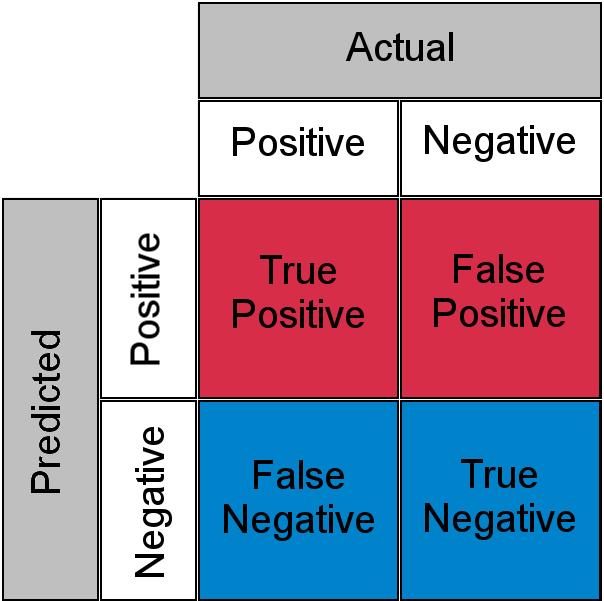

* True Positive: Actual Positive and Predicted as Positive
* True Negative: Actual Negative and Predicted as Negative
* False Positive(Type I Error): Actual Negative but predicted as Positive
* False Negative(Type II Error): Actual Positive but predicted as Negative

In simple terms, you can call False Positive as false alarm and False Negative as a miss. Now let us look at what TPR and FPR.

$$..........$$

$$ TPR = \frac{TP}{TP + FN} $$ 

$$ FPR = \frac{FP}{TN + FP} $$ 

$$..........$$

Basically TPR/Recall/Sensitivity is ratio of positive examples that are correctly identified and FPR is the ratio of negative examples that are incorrectly classified.

$$..........$$

ROC is nothing but the plot between TPR and FPR across all possible thresholds and AUC is the entire area beneath this ROC curve.

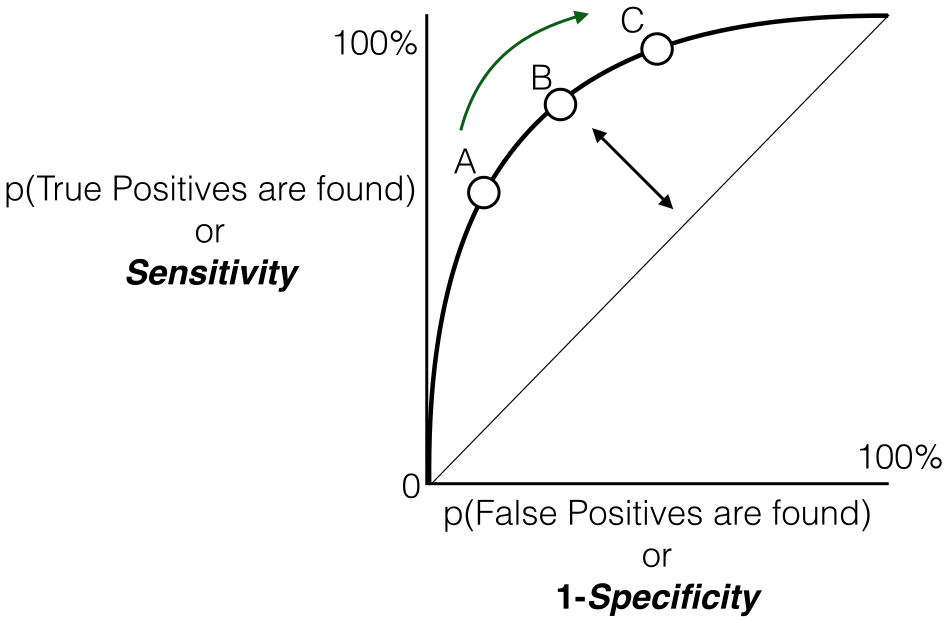

### Case 1: Not removing any outliers and apply Label Encoding

In [6]:
data = Data.copy()
data.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [7]:
data = data[data["workclass"] != "?"] 
data = data[data["occupation"] != "?"] 
data = data[data["native-country"] != "?"]

In [8]:
data.shape

(45222, 15)

In [9]:
inc = {'<=50K':0, '>50K':1}
data["income"].replace(inc, inplace=True)

In [10]:
le = LabelEncoder()
data['workclass'] = le.fit_transform(data['workclass'])
data['education'] = le.fit_transform(data['education'])
data['marital-status'] = le.fit_transform(data['marital-status'])
data['occupation'] = le.fit_transform(data['occupation'])
data['relationship'] = le.fit_transform(data['relationship'])
data['race'] = le.fit_transform(data['race'])
data['gender'] = le.fit_transform(data['gender'])
data['native-country'] = le.fit_transform(data['native-country'])


data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [11]:
x=data.drop(['income'],axis=1)
y=data['income']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 78.38584853510227
Accuracy Score of Logistic Regression model in test is  78.28730961660723
...........

Accuracy Score of Decision Tree Classifier model in test is 80.7739082365948
Accuracy Score of Decision Tree Classifier model in train is 99.98894325123698
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 76.5395245992261
Accuracy Score of K-Nearest Neighbour Classifier model in train is 83.15504325952953
.............

Accuracy Score of Gradient Boosting Classifier model in test is 86.06965174129353
Accuracy Score of Gradient Boosting Classifier model in train is 86.47206788843741
.............

Accuracy Score of Random Forest model in test is 85.24046434494196
Accuracy Score of Random Forest model in train is 99.98065068966471
.............

Accuracy Score of MultinomialNB model in test is 77.22498618021007
Accuracy Score of MultinomialNB model in train is 77.76487823755424
.............

Accura

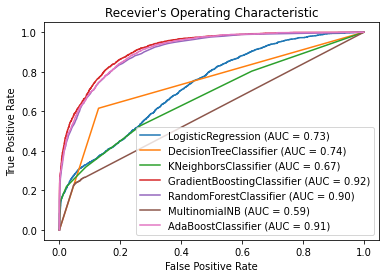

In [14]:
classifiers = [lg, dtc, knc,gbc, rfc, nb, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Lets see confusion matrix of Gradient Boosting Classifier

In [15]:
print("Accuracy Score of Gradient Boosting Classifier model is", accuracy_score(y_test, pred_gbc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_gbc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_gbc))

Accuracy Score of Gradient Boosting Classifier model is 86.06965174129353
Confusion matrix for RFC Model is
[[6473  322]
 [ 938 1312]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6795
           1       0.80      0.58      0.68      2250

    accuracy                           0.86      9045
   macro avg       0.84      0.77      0.79      9045
weighted avg       0.86      0.86      0.85      9045



### Let's see cross validation in Gradient Boosting Classifier

In [16]:
scores = cross_val_score(gbc, x, y, cv=5)

In [17]:
scores

array([0.85892758, 0.86202322, 0.85968598, 0.86344538, 0.86698364])

In [18]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.86 accuracy with a standard deviation of 0.0029


### Case 2 :  Removing Outliers and Apply Label Encoding

In [19]:
data_2 = Data.copy()

In [20]:
data_2 = data_2[data_2["workclass"] != "?"] 
data_2 = data_2[data_2["occupation"] != "?"] 
data_2 = data_2[data_2["native-country"] != "?"]

inc = {'<=50K':0, '>50K':1}
data_2["income"].replace(inc, inplace=True)

In [21]:
num_feat = [feature for feature in data_2.columns if data_2[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_feat))

Number of numerical variables:  7


BoxPlots of the features:


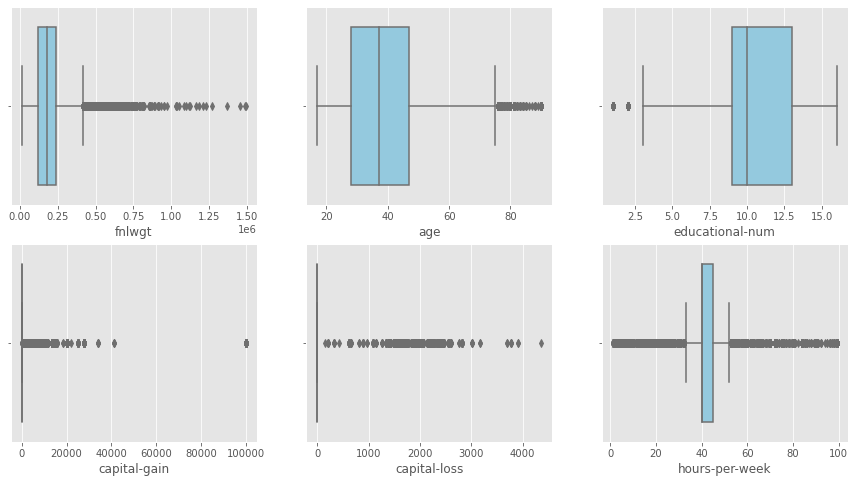

In [22]:
plt.style.use('ggplot')
clist = ['fnlwgt','age','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (15,8))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(data_2[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

### see the outliers in fnlwgt and age 

#### This distribution of fnlwt and age data will probably not follow the familiar bell-shaped curve (a.k.a. the normal distribution). The resulting distribution will be asymmetrical with a longer tail on the right side. This is because there's small variability on the left side with a short tail , and larger variability right side, hence the longer tail.

#### One solution to this is to transform your data into normality using a Box-Cox transformation. Minitab will select the best mathematical function for this data transformation. The objective is to obtain a normal distribution of the transformed data (after transformation) and a constant variance.

Lambda value used for Transformation: 0.41591037074490983


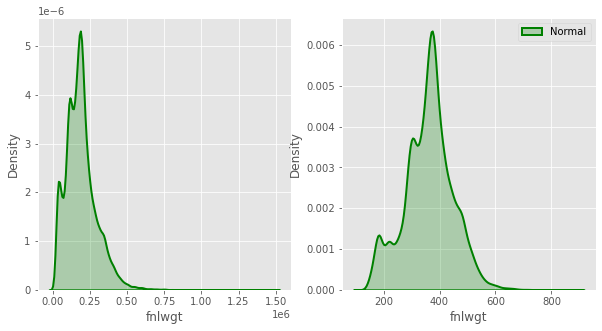

In [23]:
# transform training data & save lambda value
data_2['fnlwgt'], fitted_lambda = stats.boxcox(data_2['fnlwgt'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(Data['fnlwgt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(data_2['fnlwgt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

#### See the result before and after transformation in fnlwt

Lambda value used for Transformation: 0.2097931757189425


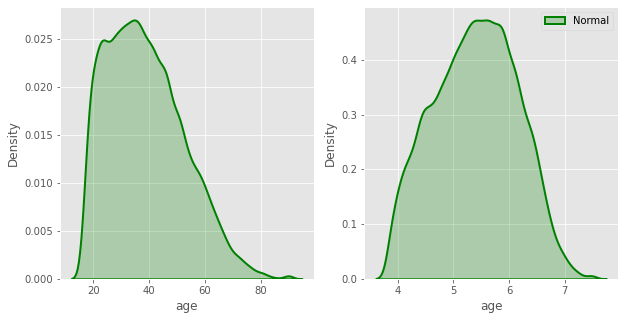

In [24]:
# transform training data & save lambda value
data_2['age'], fitted_lambda = stats.boxcox(data_2['age'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(Data['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(data_2['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

#### See the result before and after transformation in age

BoxPlots of the features:


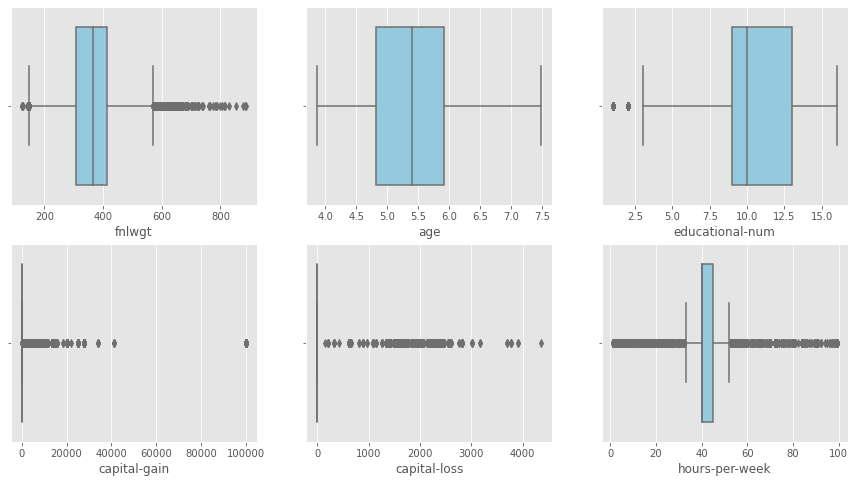

In [25]:
plt.style.use('ggplot')
clist = ['fnlwgt','age','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (15,8))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(data_2[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [26]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_2[num_feat]))
print(z)

[[1.06391922 0.49672221 1.22155881 ... 0.21878026 0.07812006 0.57403082]
 [0.09422749 0.99176373 0.43812161 ... 0.21878026 0.7547014  0.57403082]
 [0.76042643 1.32990061 0.73703421 ... 0.21878026 0.07812006 1.74206675]
 ...
 [1.37179686 0.21806383 0.43812161 ... 0.21878026 0.07812006 0.57403082]
 [1.39770604 0.27314198 0.43812161 ... 0.21878026 1.74376299 0.57403082]
 [1.03094394 0.98246713 0.43812161 ... 0.21878026 0.07812006 1.74206675]]


In [27]:
threshold = 3
np.where(z > 3)

(array([   20,    46,    74, ..., 45132, 45148, 45185], dtype=int64),
 array([5, 4, 4, ..., 5, 5, 3], dtype=int64))

In [28]:
data_2 = data_2[(z < 3).all(axis=1)]
print(data_2.shape)

(41837, 15)


BoxPlots of the features:


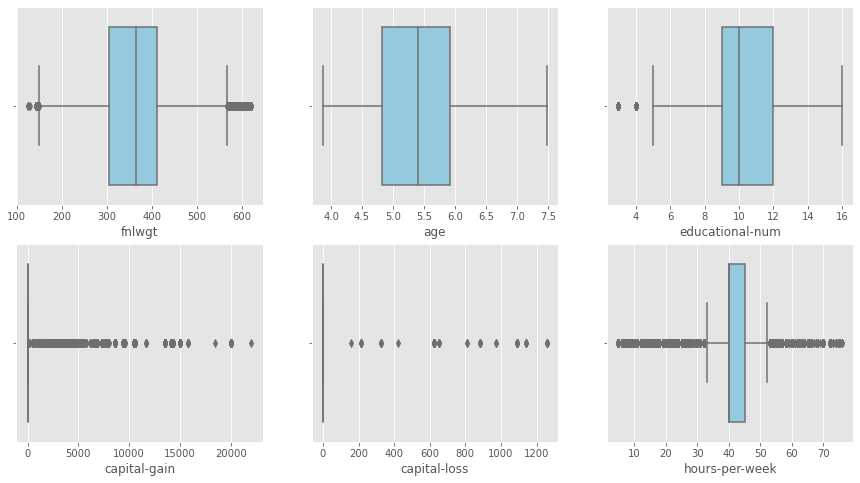

In [29]:
plt.style.use('ggplot')
clist = ['fnlwgt','age','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (15,8))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(data_2[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [30]:
#Q1 = data_2[num_feat].quantile(0.05)    (Not gives good result)
#Q3 = data_2[num_feat].quantile(0.95)
#IQR = Q3 - Q1
#print(IQR)

In [31]:
#data_2[num_feat] < (Q1 - 1.5 * IQR) |(data_2[num_feat] > (Q3 + 1.5 * IQR))

In [32]:
#data_2 = data_2[~((data_2 < (Q1 - 1.5 * IQR)) |(data_2 > (Q3 + 1.5 * IQR))).any(axis=1)]
#data_2.shape

#### I have also seen the result while dropping outliers with different quantile but result is not good enough, even AUC score drop down somewhat (you can experiment by your end and see the result)

In [33]:
df = data_2.copy()
df.shape

(41837, 15)

In [34]:
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['gender'] = le.fit_transform(df['gender'])
df['native-country'] = le.fit_transform(df['native-country'])


df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,4.597951,2,403.542630,1,7,4,6,3,2,1,0,0,40,37,0
1,5.457768,2,273.747135,10,9,2,4,0,4,1,0,0,50,37,0
2,4.823266,1,476.195517,6,12,2,10,0,4,1,0,0,40,37,1
3,5.777119,2,349.003921,13,10,2,6,0,2,1,7688,0,40,37,1
5,5.221951,2,381.806221,0,6,4,7,1,4,1,0,0,30,37,0


In [35]:
x=df.drop(['income'],axis=1)
y=df['income']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [37]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 81.26195028680688
Accuracy Score of Logistic Regression model in test is  81.00630434133078
...........

Accuracy Score of Decision Tree Classifier model in test is 80.8197896749522
Accuracy Score of Decision Tree Classifier model in train is 99.99103648152021
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 81.30975143403441
Accuracy Score of K-Nearest Neighbour Classifier model in train is 86.98198332785563
.............

Accuracy Score of Gradient Boosting Classifier model in test is 86.2810707456979
Accuracy Score of Gradient Boosting Classifier model in train is 86.2768532074457
.............

Accuracy Score of Random Forest model in test is 85.24139579349904
Accuracy Score of Random Forest model in train is 99.98804864202695
.............

Accuracy Score of MultinomialNB model in test is 78.99139579349904
Accuracy Score of MultinomialNB model in train is 78.61603274672085
.............

Accurac

I have also seen the result after droping education column but it does not effect more

### Case 3 : No outliers and Apply Standard Scaler

In [38]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.038263,-0.204047,0.519689,-2.440299,-1.274743,0.927143,0.015113,0.972534,-2.010026,0.706397,-0.246389,-0.035804,-0.030488,0.258829
1,0.116803,-0.204047,-1.002451,0.248851,-0.454821,-0.396664,-0.480009,-0.902254,0.386209,0.706397,-0.246389,-0.035804,0.896818,0.258829
2,-0.735577,-1.252528,1.371705,-0.946327,0.775062,-0.396664,1.005356,-0.902254,0.386209,0.706397,-0.246389,-0.035804,-0.030488,0.258829
3,0.545814,-0.204047,-0.119898,1.145235,-0.044860,-0.396664,0.015113,-0.902254,-2.010026,0.706397,3.038408,-0.035804,-0.030488,0.258829
4,-0.199990,-0.204047,0.264781,-2.739093,-1.684704,0.927143,0.262673,-0.277325,0.386209,0.706397,-0.246389,-0.035804,-0.957793,0.258829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41832,-0.833495,-0.204047,0.776182,-0.946327,0.775062,-0.396664,1.500477,2.222392,0.386209,-1.415634,-0.246389,-0.035804,-0.215949,0.258829
41833,0.265406,-0.204047,-0.184201,0.248851,-0.454821,-0.396664,0.015113,-0.902254,0.386209,0.706397,-0.246389,-0.035804,-0.030488,0.258829
41834,1.390974,-0.204047,-0.211258,0.248851,-0.454821,2.250950,-1.470252,1.597463,0.386209,-1.415634,-0.246389,-0.035804,-0.030488,0.258829
41835,-1.371162,-0.204047,0.291054,0.248851,-0.454821,0.927143,-1.470252,0.972534,0.386209,0.706397,-0.246389,-0.035804,-1.885099,0.258829


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [40]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

# For MultinomialNB
#nb = MultinomialNB() # making the Multinomial Naive Bayes class
#nb.fit(x_train, y_train) # fitting the model
#pred_nb = nb.predict(x_test) # predicting the values
#print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
#pred_nb_train = nb.predict(x_train)
#print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
#print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 82.45697896749522
Accuracy Score of Logistic Regression model in test is  82.64065254414533
...........

Accuracy Score of Decision Tree Classifier model in test is 80.41347992351817
Accuracy Score of Decision Tree Classifier model in train is 99.98506080253368
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 82.64818355640536
Accuracy Score of K-Nearest Neighbour Classifier model in train is 88.17114344617407
.............

Accuracy Score of Gradient Boosting Classifier model in test is 85.94646271510517
Accuracy Score of Gradient Boosting Classifier model in train is 86.29478024440527
.............

Accuracy Score of Random Forest model in test is 84.50047801147228
Accuracy Score of Random Forest model in train is 99.98506080253368
.............

Accuracy Score of ADA Boost model in test is 85.39674952198853
Accuracy Score of ADA Boost model in train is 85.63745555588754


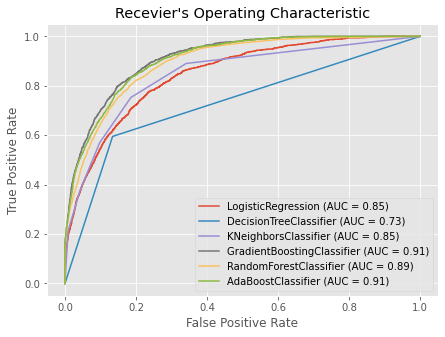

In [41]:
classifiers = [lg, dtc, knc,gbc, rfc, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Now after Standard Scaler the result  is somewhat good than previon one

### Case 4 : No outliers and One Hot Encoding (Here I replace the values of some columns and apply dummies with all catagorical feature)

In [47]:
df_2 = data_2.copy()

In [48]:
df_2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,4.597951,Private,403.542630,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,5.457768,Private,273.747135,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,4.823266,Local-gov,476.195517,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,5.777119,Private,349.003921,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,5.221951,Private,381.806221,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [49]:
df_2['marital-status'] = df_2['marital-status'].replace({"Never-married":"Single","Divorced":"Single","Separated":"Single",
                                                     "Widowed":"Single","Married-spouse-absent":"Single",
                                                     "Married-civ-spouse":"Married","Married-AF-spouse":"Married"})

df_2["workclass"] = df_2["workclass"].replace({"Private":"Paid_Employed","Self-emp-not-inc":"Paid_Employed",
                                           "Local-gov":"Paid_Employed","unknown":"Paid_Employed",
                                           "State-gov":"Paid_Employed","Self-emp-inc":"Paid_Employed",
                                           "Federal-gov":"Paid_Employed","Without-pay":"Unpaid_Employed",
                                           "Never-worked":"UnEmployed",})

df_2['education'] = df_2['education'].replace({'Preschool':'Not-grad','1st-4th':'Not-grad','5th-6th':'Not-grad',
                                           '7th-8th':'Not-grad','9th':'Not-grad','10th':'Not-grad',
                                           '11th':'Not-grad','12th':'Not-grad',})

df_2['native-country'] = np.where(df_2['native-country'].str.contains("United-States"), "United-States", "Other")

df_2['hours-per-week'] = np.where(df_2['hours-per-week'] < 40, "ls_40", "gt_40")

df_2['age'] = np.where(df_2['age'] < 45, "ls_45", "gt_45")

In [50]:
df_2['gender'] = df_2['gender'].map({'Male':0,'Female':1})

In [51]:
df_2

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,ls_45,Paid_Employed,403.542630,Not-grad,7,Single,Machine-op-inspct,Own-child,Black,0,0,0,gt_40,United-States,0
1,ls_45,Paid_Employed,273.747135,HS-grad,9,Married,Farming-fishing,Husband,White,0,0,0,gt_40,United-States,0
2,ls_45,Paid_Employed,476.195517,Assoc-acdm,12,Married,Protective-serv,Husband,White,0,0,0,gt_40,United-States,1
3,ls_45,Paid_Employed,349.003921,Some-college,10,Married,Machine-op-inspct,Husband,Black,0,7688,0,gt_40,United-States,1
5,ls_45,Paid_Employed,381.806221,Not-grad,6,Single,Other-service,Not-in-family,White,0,0,0,ls_40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,ls_45,Paid_Employed,425.414245,Assoc-acdm,12,Married,Tech-support,Wife,White,1,0,0,ls_40,United-States,0
48838,ls_45,Paid_Employed,343.520717,HS-grad,9,Married,Machine-op-inspct,Husband,White,0,0,0,gt_40,United-States,1
48839,ls_45,Paid_Employed,341.213517,HS-grad,9,Single,Adm-clerical,Unmarried,White,1,0,0,gt_40,United-States,0
48840,ls_45,Paid_Employed,384.046505,HS-grad,9,Single,Adm-clerical,Own-child,White,0,0,0,ls_40,United-States,0


In [52]:
cat_feat = df_2.select_dtypes(include='O').columns
df_dummies= pd.get_dummies(df_2[cat_feat],  drop_first=True)

In [53]:
#df.drop(['fnlwgt'],axis=1,inplace=True)


In [54]:
df_2 = df_2.drop(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'hours-per-week', 'native-country'], axis = 1)
df_2 = pd.concat([df_2, df_dummies], axis = 1)

In [55]:
df_2.head(2)

,fnlwgt,educational-num,gender,capital-gain,capital-loss,income,workclass_Unpaid_Employed,education_Assoc-voc,education_Bachelors,education_Doctorate,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,hours-per-week_ls_40,native-country_United-States
0,403.542630,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,273.747135,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [56]:
df_2 = df_2.drop(['fnlwgt', 'educational-num'], axis = 1)

In [57]:
x=df_2.drop(['income'],axis=1)
y=df_2['income']

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()http://localhost:8888/notebooks/Innomatics_Internship_APR_21/Task%20-%2011%20(EDA%20%2B%20Missing%20Value%20%2B%20Outlier%20%2B%20ML%20Model)/Task%2011%20Research.ipynb#
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 84.28537284894837
Accuracy Score of Logistic Regression model in test is  84.3526845737847
...........

Accuracy Score of Decision Tree Classifier model in test is 84.6916826003824
Accuracy Score of Decision Tree Classifier model in train is 87.09850906809287
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 84.9067877629063
Accuracy Score of K-Nearest Neighbour Classifier model in train is 85.88245839433506
.............

Accuracy Score of Gradient Boosting Classifier model in test is 85.36089866156787
Accuracy Score of Gradient Boosting Classifier model in train is 85.64343123487407
.............

Accuracy Score of Random Forest model in test is 84.83508604206502
Accuracy Score of Random Forest model in train is 87.09850906809287
.............

Accuracy Score of MultinomialNB model in test is 78.33413001912047
Accuracy Score of MultinomialNB model in train is 78.76841256087724
.............

Accurac

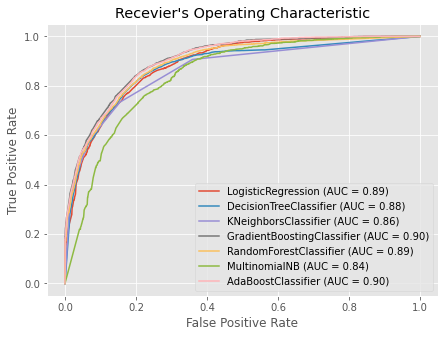

In [60]:
classifiers = [lg, dtc, knc ,gbc, rfc, nb, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Case 5: No outliers, dummies feature and Standardization

In [61]:
scaler = StandardScaler()
x=scaler.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-0.706397,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,-0.707614,-0.236946,2.678821,...,-0.177079,2.360497,-0.350227,-0.219137,-0.171325,3.085836,-0.088207,-2.467999,-0.542717,0.302105
1,-0.706397,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,1.413200,-0.236946,-0.373299,...,-0.177079,-0.423640,-0.350227,-0.219137,-0.171325,-0.324061,-0.088207,0.405187,-0.542717,0.302105
2,-0.706397,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,-0.707614,-0.236946,-0.373299,...,-0.177079,-0.423640,-0.350227,-0.219137,-0.171325,-0.324061,-0.088207,0.405187,-0.542717,0.302105
3,-0.706397,3.038408,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,-0.707614,-0.236946,-0.373299,...,-0.177079,-0.423640,-0.350227,-0.219137,-0.171325,3.085836,-0.088207,-2.467999,-0.542717,0.302105
4,-0.706397,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,-0.707614,-0.236946,2.678821,...,-0.177079,-0.423640,-0.350227,-0.219137,-0.171325,-0.324061,-0.088207,0.405187,1.842581,0.302105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41832,1.415634,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,-0.707614,-0.236946,-0.373299,...,-0.177079,-0.423640,-0.350227,4.563355,-0.171325,-0.324061,-0.088207,0.405187,1.842581,0.302105
41833,-0.706397,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,1.413200,-0.236946,-0.373299,...,-0.177079,-0.423640,-0.350227,-0.219137,-0.171325,-0.324061,-0.088207,0.405187,-0.542717,0.302105
41834,1.415634,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,1.413200,-0.236946,-0.373299,...,-0.177079,-0.423640,2.855294,-0.219137,-0.171325,-0.324061,-0.088207,0.405187,-0.542717,0.302105
41835,-0.706397,-0.246389,-0.035804,-0.021869,-0.215215,-0.444793,-0.102383,1.413200,-0.236946,-0.373299,...,-0.177079,2.360497,-0.350227,-0.219137,-0.171325,-0.324061,-0.088207,0.405187,1.842581,0.302105


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
#nb = MultinomialNB() # making the Multinomial Naive Bayes class
#nb.fit(x_train, y_train) # fitting the model
#pred_nb = nb.predict(x_test) # predicting the values
#print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
#pred_nb_train = nb.predict(x_train)
#print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
#print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 84.29732313575525
Accuracy Score of Logistic Regression model in test is  84.79488481878754
...........

Accuracy Score of Decision Tree Classifier model in test is 84.40487571701722
Accuracy Score of Decision Tree Classifier model in train is 87.14930233947833
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 82.58843212237093
Accuracy Score of K-Nearest Neighbour Classifier model in train is 84.82476321372016
.............

Accuracy Score of Gradient Boosting Classifier model in test is 85.1338432122371
Accuracy Score of Gradient Boosting Classifier model in train is 85.82270160446981
.............

Accuracy Score of Random Forest model in test is 84.44072657743786
Accuracy Score of Random Forest model in train is 87.14930233947833
.............

Accuracy Score of ADA Boost model in test is 84.77533460803059
Accuracy Score of ADA Boost model in train is 85.38946487794675


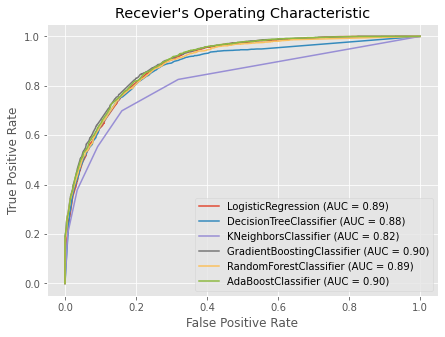

In [64]:
classifiers = [lg, dtc, knc ,gbc, rfc, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Case 6: No outliers, Label Encoding and MinMaxScaler

In [65]:
data_2.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,4.597951,Private,403.542630,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,5.457768,Private,273.747135,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


In [66]:
dt2 = Data.copy()

In [67]:
dt2 = dt2[dt2["workclass"] != "?"] 
dt2 = dt2[dt2["occupation"] != "?"] 
dt2 = dt2[dt2["native-country"] != "?"]

In [68]:
dt2.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


BoxPlots of the features:


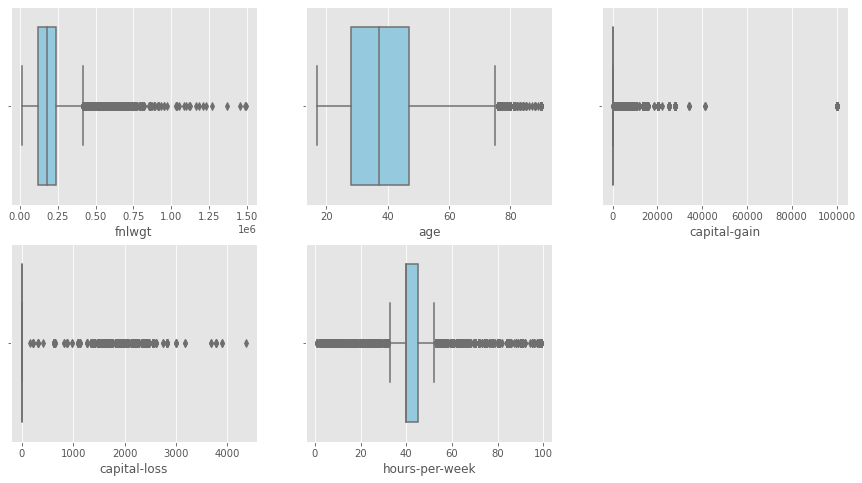

In [69]:
plt.style.use('ggplot')
box_list = ['fnlwgt','age','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (15,8))
for i in range(0, len(box_list)):
    plt.subplot(2,3, i+1)
    sns.boxplot(dt2[box_list[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [70]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dt2[box_list]))
print(np.shape(np.where(z > 3)))
print(z)

(2, 3647)
[[0.35088942 1.02498291 0.1467332  0.21878026 0.07812006]
 [0.94587846 0.04145504 0.1467332  0.21878026 0.7547014 ]
 [1.39359159 0.79801494 0.1467332  0.21878026 0.07812006]
 ...
 [0.35805983 1.47166476 0.1467332  0.21878026 0.07812006]
 [0.11127873 1.25195088 0.1467332  0.21878026 1.74376299]
 [0.92951628 1.01772882 1.85477297 0.21878026 0.07812006]]


In [71]:
threshold = 3
np.where(z > 3)

(array([   20,    46,    74, ..., 45148, 45178, 45185], dtype=int64),
 array([4, 3, 3, ..., 4, 0, 2], dtype=int64))

In [72]:
dt2 = dt2[(z < 3).all(axis=1)]
print(dt2.shape)

(41665, 15)


In [73]:
le = LabelEncoder()
dt2['workclass'] = le.fit_transform(dt2['workclass'])
dt2['education'] = le.fit_transform(dt2['education'])
dt2['marital-status'] = le.fit_transform(dt2['marital-status'])
dt2['occupation'] = le.fit_transform(dt2['occupation'])
dt2['relationship'] = le.fit_transform(dt2['relationship'])
dt2['race'] = le.fit_transform(dt2['race'])
dt2['gender'] = le.fit_transform(dt2['gender'])
dt2['native-country'] = le.fit_transform(dt2['native-country'])


dt2.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,<=50K


In [74]:
x=dt2.drop(['income'],axis=1)
y=dt2['income']

In [75]:
scale = MinMaxScaler()
x = scale.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.131148,0.333333,0.432408,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.00000,0.0,0.492958,0.948718
1,0.344262,0.333333,0.154354,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.00000,0.0,0.633803,0.948718
2,0.180328,0.166667,0.655985,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.00000,0.0,0.492958,0.948718
3,0.442623,0.333333,0.297471,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.34882,0.0,0.492958,0.948718
4,0.278689,0.333333,0.375353,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.00000,0.0,0.352113,0.948718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41660,0.163934,0.333333,0.494316,0.466667,0.733333,0.333333,0.923077,1.0,1.0,0.0,0.00000,0.0,0.464789,0.948718
41661,0.377049,0.333333,0.285396,0.733333,0.533333,0.333333,0.461538,0.0,1.0,1.0,0.00000,0.0,0.492958,0.948718
41662,0.672131,0.333333,0.280394,0.733333,0.533333,1.000000,0.000000,0.8,1.0,0.0,0.00000,0.0,0.492958,0.948718
41663,0.081967,0.333333,0.381030,0.733333,0.533333,0.666667,0.000000,0.6,1.0,1.0,0.00000,0.0,0.211268,0.948718


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [77]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 82.35929437177487
Accuracy Score of Logistic Regression model in test is  82.6413056522261
...........

Accuracy Score of Decision Tree Classifier model in test is 80.19920796831873
Accuracy Score of Decision Tree Classifier model in train is 99.9879995199808
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 83.45133805352214
Accuracy Score of K-Nearest Neighbour Classifier model in train is 88.05052202088083
.............

Accuracy Score of Gradient Boosting Classifier model in test is 86.13944557782311
Accuracy Score of Gradient Boosting Classifier model in train is 86.43345733829352
.............

Accuracy Score of Random Forest model in test is 85.21540861634466
Accuracy Score of Random Forest model in train is 99.9879995199808
.............

Accuracy Score of MultinomialNB model in test is 78.30313212528502
Accuracy Score of MultinomialNB model in train is 78.83415336613464
.............

Accurac

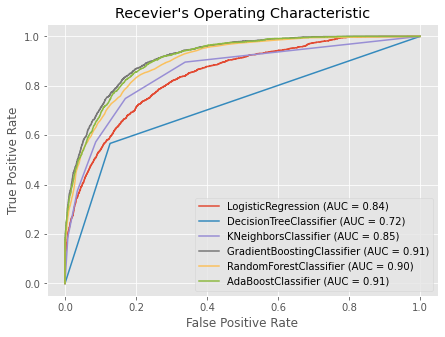

In [78]:
classifiers = [lg, dtc, knc,gbc, rfc, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Case 7: No outliers, One-Hot Encoding and MinMaxScaler

In [79]:
dt3 = data_2.copy()

In [82]:
dt3.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,4.597951,Private,403.542630,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,5.457768,Private,273.747135,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


In [83]:
dt3['marital-status'] = dt3['marital-status'].replace({"Never-married":"Single","Divorced":"Single","Separated":"Single",
                                                     "Widowed":"Single","Married-spouse-absent":"Single",
                                                     "Married-civ-spouse":"Married","Married-AF-spouse":"Married"})

dt3["workclass"] = dt3["workclass"].replace({"Private":"Paid_Employed","Self-emp-not-inc":"Paid_Employed",
                                           "Local-gov":"Paid_Employed","unknown":"Paid_Employed",
                                           "State-gov":"Paid_Employed","Self-emp-inc":"Paid_Employed",
                                           "Federal-gov":"Paid_Employed","Without-pay":"Unpaid_Employed",
                                           "Never-worked":"UnEmployed",})

dt3['education'] = dt3['education'].replace({'Preschool':'Not-grad','1st-4th':'Not-grad','5th-6th':'Not-grad',
                                           '7th-8th':'Not-grad','9th':'Not-grad','10th':'Not-grad',
                                           '11th':'Not-grad','12th':'Not-grad',})

dt3['native-country'] = np.where(dt3['native-country'].str.contains("United-States"), "United-States", "Other")

dt3['hours-per-week'] = np.where(dt3['hours-per-week'] < 40, "ls_40", "gt_40")

dt3['age'] = np.where(dt3['age'] < 45, "ls_45", "gt_45")
dt3['gender'] = dt3['gender'].map({'Male':0,'Female':1})

In [84]:
dt3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,ls_45,Paid_Employed,403.542630,Not-grad,7,Single,Machine-op-inspct,Own-child,Black,0,0,0,gt_40,United-States,0
1,ls_45,Paid_Employed,273.747135,HS-grad,9,Married,Farming-fishing,Husband,White,0,0,0,gt_40,United-States,0
2,ls_45,Paid_Employed,476.195517,Assoc-acdm,12,Married,Protective-serv,Husband,White,0,0,0,gt_40,United-States,1
3,ls_45,Paid_Employed,349.003921,Some-college,10,Married,Machine-op-inspct,Husband,Black,0,7688,0,gt_40,United-States,1
5,ls_45,Paid_Employed,381.806221,Not-grad,6,Single,Other-service,Not-in-family,White,0,0,0,ls_40,United-States,0


In [85]:
cat_feat = dt3.select_dtypes(include='O').columns
dt_dummies= pd.get_dummies(dt3[cat_feat],  drop_first=True)

In [86]:
dt3

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,ls_45,Paid_Employed,403.542630,Not-grad,7,Single,Machine-op-inspct,Own-child,Black,0,0,0,gt_40,United-States,0
1,ls_45,Paid_Employed,273.747135,HS-grad,9,Married,Farming-fishing,Husband,White,0,0,0,gt_40,United-States,0
2,ls_45,Paid_Employed,476.195517,Assoc-acdm,12,Married,Protective-serv,Husband,White,0,0,0,gt_40,United-States,1
3,ls_45,Paid_Employed,349.003921,Some-college,10,Married,Machine-op-inspct,Husband,Black,0,7688,0,gt_40,United-States,1
5,ls_45,Paid_Employed,381.806221,Not-grad,6,Single,Other-service,Not-in-family,White,0,0,0,ls_40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,ls_45,Paid_Employed,425.414245,Assoc-acdm,12,Married,Tech-support,Wife,White,1,0,0,ls_40,United-States,0
48838,ls_45,Paid_Employed,343.520717,HS-grad,9,Married,Machine-op-inspct,Husband,White,0,0,0,gt_40,United-States,1
48839,ls_45,Paid_Employed,341.213517,HS-grad,9,Single,Adm-clerical,Unmarried,White,1,0,0,gt_40,United-States,0
48840,ls_45,Paid_Employed,384.046505,HS-grad,9,Single,Adm-clerical,Own-child,White,0,0,0,ls_40,United-States,0


In [87]:
dt3 = dt3.drop(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'hours-per-week', 'native-country'], axis = 1)
dt3 = pd.concat([dt3, df_dummies], axis = 1)

In [88]:
inc = {'<=50K':0, '>50K':1}
dt3["income"].replace(inc, inplace=True)

In [89]:
dt3.head(2)

,fnlwgt,educational-num,gender,capital-gain,capital-loss,income,workclass_Unpaid_Employed,education_Assoc-voc,education_Bachelors,education_Doctorate,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,hours-per-week_ls_40,native-country_United-States
0,403.542630,7,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
1,273.747135,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [90]:
x=dt3.drop(['income'],axis=1)
y=dt3['income']

In [91]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.561403,0.307692,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.300559,0.461538,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.707410,0.692308,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.451799,0.538462,0.0,0.34882,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.517720,0.230769,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41832,0.605357,0.692308,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
41833,0.440780,0.461538,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41834,0.436143,0.461538,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
41835,0.522223,0.461538,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [93]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 84.40487571701722
Accuracy Score of Logistic Regression model in test is  84.788909139801
...........

Accuracy Score of Decision Tree Classifier model in test is 80.13862332695984
Accuracy Score of Decision Tree Classifier model in train is 99.77889987749859
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 81.4651051625239
Accuracy Score of K-Nearest Neighbour Classifier model in train is 87.2538767217425
.............

Accuracy Score of Gradient Boosting Classifier model in test is 85.46845124282983
Accuracy Score of Gradient Boosting Classifier model in train is 85.8944097523081
.............

Accuracy Score of Random Forest model in test is 81.3217017208413
Accuracy Score of Random Forest model in train is 99.7699363590188
.............

Accuracy Score of MultinomialNB model in test is 83.67590822179733
Accuracy Score of MultinomialNB model in train is 84.05987630344498
.............

Accuracy Sc

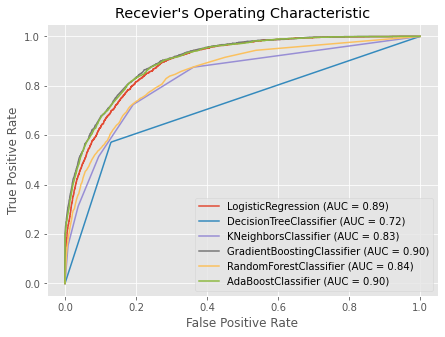

In [94]:
classifiers = [lg, dtc, knc,gbc, rfc, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Now I check the accuracy by using SMOTE AND WITHOUT SMOTE

In [95]:
imp_df = Data.copy()

In [96]:
inc = {'<=50K':0, '>50K':1}
imp_df["income"].replace(inc, inplace=True)

<AxesSubplot:xlabel='count', ylabel='workclass'>

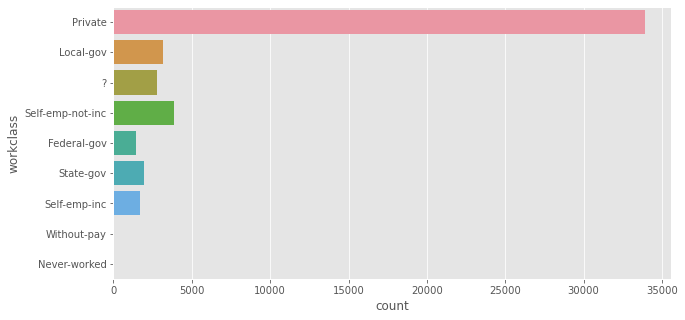

In [97]:
plt.figure(figsize = (10,5))
sns.countplot(y = imp_df["workclass"])

In [98]:
imp_df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [99]:
imp_df['workclass'] = imp_df['workclass'].str.replace('Never-worked', 'Without-pay')

<AxesSubplot:xlabel='count', ylabel='workclass'>

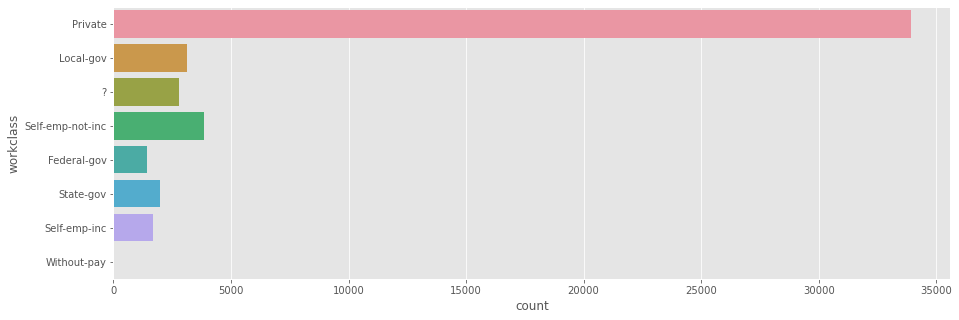

In [100]:
plt.figure(figsize = (15,5))
sns.countplot(y = imp_df["workclass"], )

In [101]:
imp_df['workclass'] = imp_df['workclass'].replace('?', np.NaN)

In [102]:
imp_df.isnull().sum().sum()

2799

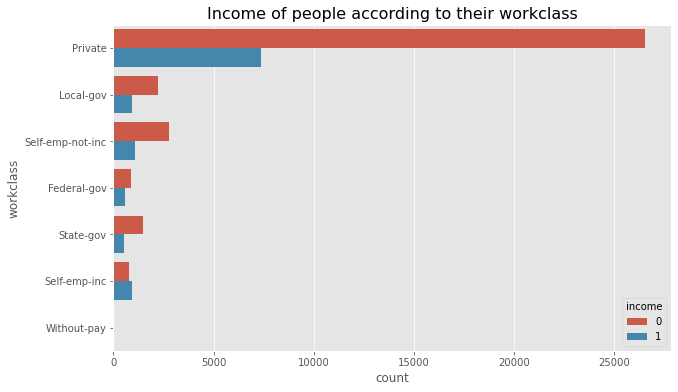

In [103]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
plt.title("Income of people according to their workclass", fontsize = 16)
sns.countplot(y = imp_df['workclass'], hue = imp_df['income'])
plt.show()


In [104]:
imp_df['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

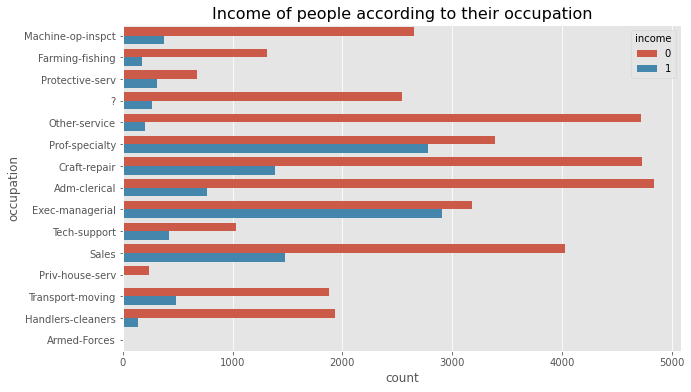

In [105]:
plt.style.use('ggplot')
plt.figure(figsize = (10,6))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = imp_df['occupation'], hue = imp_df['income'])
plt.show()

In [106]:
imp_df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

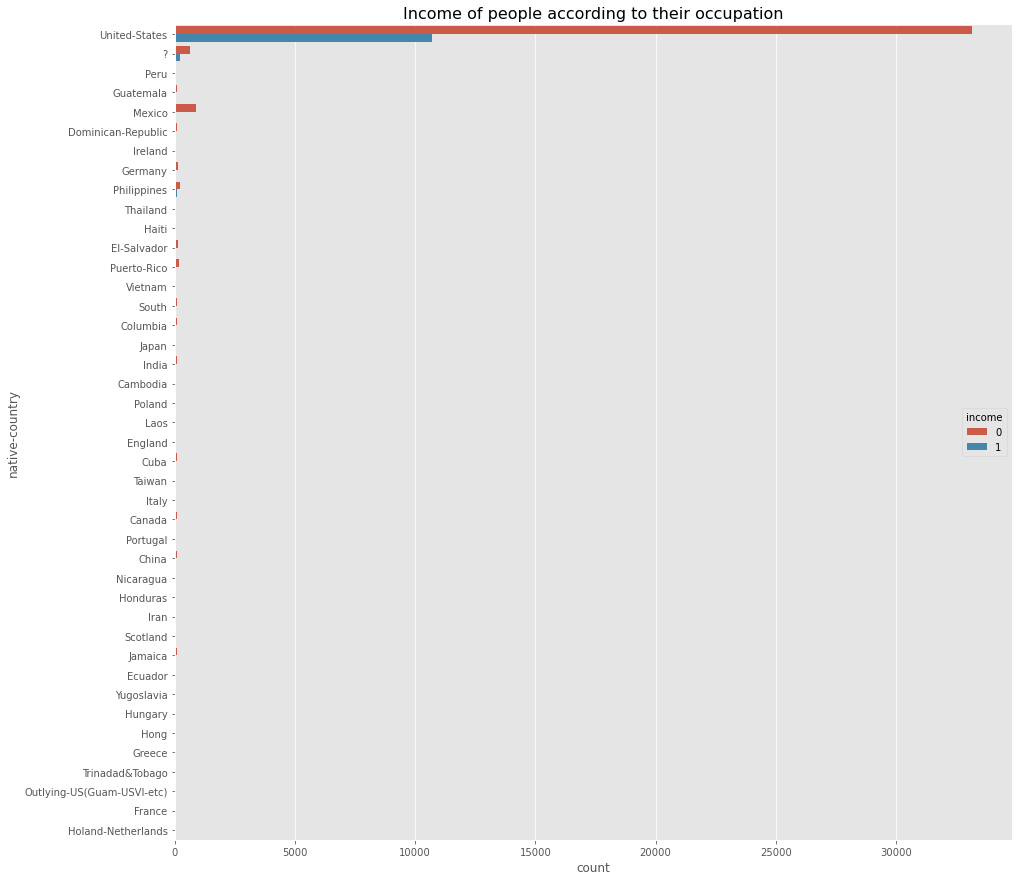

In [107]:
plt.style.use('ggplot')
plt.figure(figsize = (15,15))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = imp_df['native-country'], hue = imp_df['income'])
plt.show()

In [108]:
imp_df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [109]:
imp_df['workclass']=imp_df['workclass'].fillna(imp_df['workclass'].mode()[0])

In [110]:
imp_df['native-country'] = np.where(imp_df['native-country'].str.contains("United-States"), "United-States", "Other")


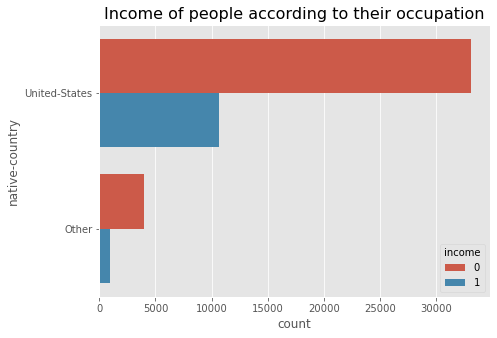

In [111]:
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.title("Income of people according to their occupation", fontsize = 16)
sns.countplot(y = imp_df['native-country'], hue = imp_df['income'])
plt.show()

In [112]:
imp_df['native-country'].value_counts() 

United-States    43832
Other             5010
Name: native-country, dtype: int64

In [113]:
imp_df['occupation'] = imp_df['occupation'].replace('?', np.NaN)
imp_df['occupation']=imp_df['occupation'].fillna(imp_df['occupation'].mode()[0])

In [114]:
dft = imp_df.copy()

In [115]:
print(imp_df.isnull().sum().sum())
print(dft .shape)

0
(48842, 15)


Lambda value used for Transformation: 0.41726769832384386


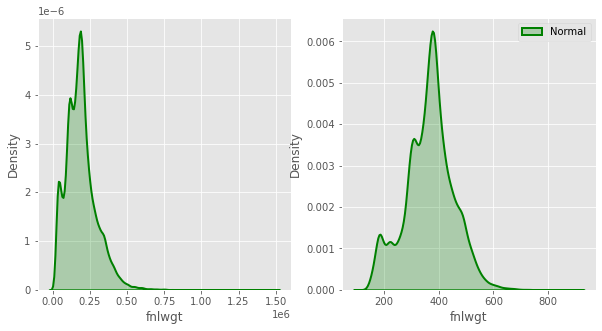

In [116]:
# transform training data & save lambda value
dft['fnlwgt'], fitted_lambda = stats.boxcox(dft['fnlwgt'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(imp_df['fnlwgt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(dft['fnlwgt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.17478286528476536


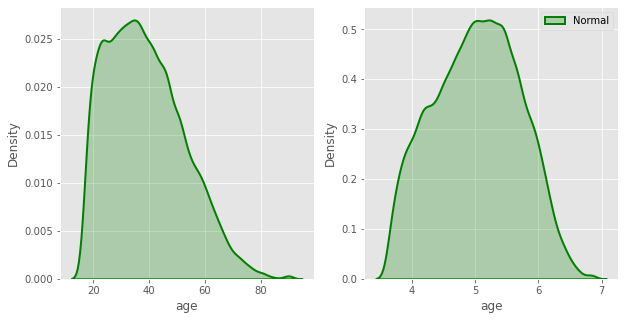

In [117]:
# transform training data & save lambda value
dft['age'], fitted_lambda = stats.boxcox(dft['age'])
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(imp_df['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
  
sns.distplot(dft['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

BoxPlots of the features:


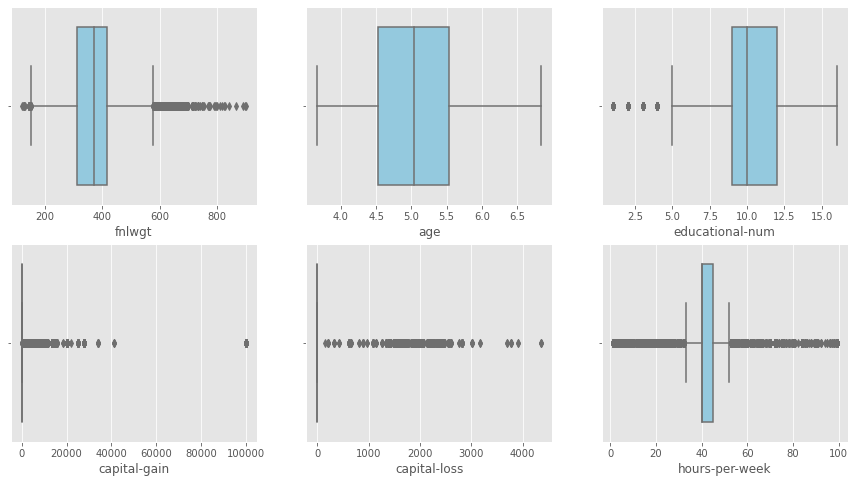

In [118]:
plt.style.use('ggplot')
clist = ['fnlwgt','age','educational-num','capital-gain','capital-loss','hours-per-week']
plt.figure(figsize = (15,8))
for i in range(0, len(clist)):
    plt.subplot(2,3, i+1)
    sns.boxplot(dft[clist[i]], color = 'skyblue')
print("BoxPlots of the features:")
plt.show()

In [119]:
z = np.abs(stats.zscore(dft[clist]))
print(z)

[[0.49707031 1.02833234 1.19725891 0.14480353 0.2171271  0.03408696]
 [0.99061483 0.09938001 0.41933527 0.14480353 0.2171271  0.77292975]
 [1.33052056 0.73120381 0.74755018 0.14480353 0.2171271  0.03408696]
 ...
 [0.21756261 1.32518243 0.41933527 0.14480353 0.2171271  0.03408696]
 [0.27349666 1.35650146 0.41933527 0.14480353 0.2171271  1.64812038]
 [0.98291959 0.99990112 0.41933527 1.87131501 0.2171271  0.03408696]]


In [120]:
threshold = 3
np.where(z > 3)

(array([   25,    52,    82, ..., 48799, 48806, 48812], dtype=int64),
 array([5, 4, 4, ..., 3, 5, 5], dtype=int64))

In [121]:
dft = dft[(z < 3).all(axis=1)]
print(dft.shape)

(45192, 15)


In [122]:
dft['marital-status'] = dft['marital-status'].replace({"Never-married":"Single","Divorced":"Single","Separated":"Single",
                                                     "Widowed":"Single","Married-spouse-absent":"Single",
                                                     "Married-civ-spouse":"Married","Married-AF-spouse":"Married"})

dft["workclass"] = dft["workclass"].replace({"Private":"Paid_Employed","Self-emp-not-inc":"Paid_Employed",
                                           "Local-gov":"Paid_Employed","unknown":"Paid_Employed",
                                           "State-gov":"Paid_Employed","Self-emp-inc":"Paid_Employed",
                                           "Federal-gov":"Paid_Employed","Without-pay":"Unpaid_Employed",
                                           "Never-worked":"UnEmployed",})

dft['education'] = dft['education'].replace({'Preschool':'Not-grad','1st-4th':'Not-grad','5th-6th':'Not-grad',
                                           '7th-8th':'Not-grad','9th':'Not-grad','10th':'Not-grad',
                                           '11th':'Not-grad','12th':'Not-grad',})

dft['native-country'] = np.where(dft['native-country'].str.contains("United-States"), "United-States", "Other")

dft['hours-per-week'] = np.where(dft['hours-per-week'] < 40, "ls_40", "gt_40")

dft['age'] = np.where(dft['age'] < 45, "ls_45", "gt_45")
dft['gender'] = dft['gender'].map({'Male':0,'Female':1})

In [123]:
cat_feat = dft.select_dtypes(include='O').columns
df_dummies= pd.get_dummies(dft[cat_feat],  drop_first=True)

In [124]:
dft = dft.drop(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'hours-per-week', 'native-country'], axis = 1)
dft = pd.concat([dft, df_dummies], axis = 1)

In [125]:
dft.shape

(45192, 40)

In [126]:
dft = dft.drop(['educational-num'], axis = 1)
dft1 = dft.copy()

In [127]:
x=dft1.drop(['income'],axis=1)
y=dft1['income']

### Without using SMOT

In [128]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = scale.fit_transform(x)
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.566347,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.308359,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.710881,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.457904,0.0,0.34882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.341685,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,0.609850,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
45188,0.447004,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45189,0.442418,1.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
45190,0.527576,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [130]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 85.31917247483129
Accuracy Score of Logistic Regression model in test is  85.09667247531326
...........

Accuracy Score of Decision Tree Classifier model in test is 80.60626175461887
Accuracy Score of Decision Tree Classifier model in train is 99.77318618095316
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 82.95165394402035
Accuracy Score of K-Nearest Neighbour Classifier model in train is 87.53077199679142
.............

Accuracy Score of Gradient Boosting Classifier model in test is 85.97189954641
Accuracy Score of Gradient Boosting Classifier model in train is 86.06754626172102
.............

Accuracy Score of Random Forest model in test is 81.69045248368182
Accuracy Score of Random Forest model in train is 99.75382402566868
.............

Accuracy Score of MultinomialNB model in test is 84.60006637902423
Accuracy Score of MultinomialNB model in train is 84.34154841921833
.............

Accurac

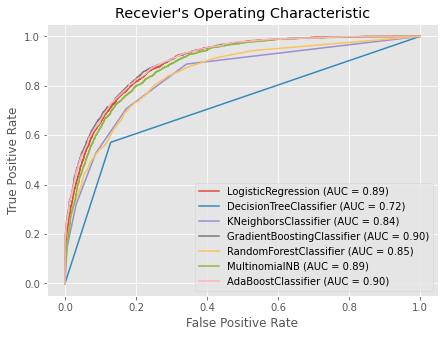

In [131]:
classifiers = [lg, dtc, knc,gbc, rfc, nb, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Case 8 No outliers, One-Hot Encoding, MinMaxScaler & SMOTE

In [132]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

In [133]:
x_new, y_new = smk.fit_resample(x,y)

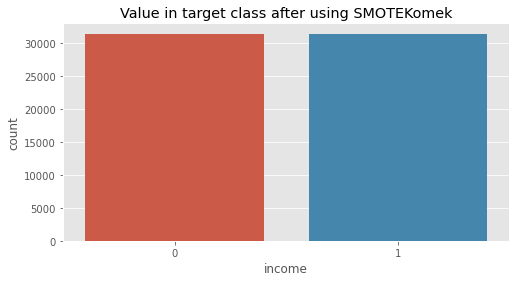

In [134]:
plt.figure(figsize = (8, 4))
plt.title('Value in target class after using SMOTEKomek')
sns.countplot(x = y_new)
plt.show()

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2)

In [136]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 85.61878233187426
Accuracy Score of Logistic Regression model in test is  85.43088524981594
...........

Accuracy Score of Decision Tree Classifier model in test is 88.96140071627536
Accuracy Score of Decision Tree Classifier model in train is 99.84280796704937
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 88.18145642658178
Accuracy Score of K-Nearest Neighbour Classifier model in train is 91.38428477625008
.............

Accuracy Score of Gradient Boosting Classifier model in test is 87.15479506565858
Accuracy Score of Gradient Boosting Classifier model in train is 86.92321467656247
.............

Accuracy Score of Random Forest model in test is 91.53203342618384
Accuracy Score of Random Forest model in train is 99.83683864934238
.............

Accuracy Score of MultinomialNB model in test is 84.09072821329089
Accuracy Score of MultinomialNB model in train is 84.12758421712398
.............

Accu

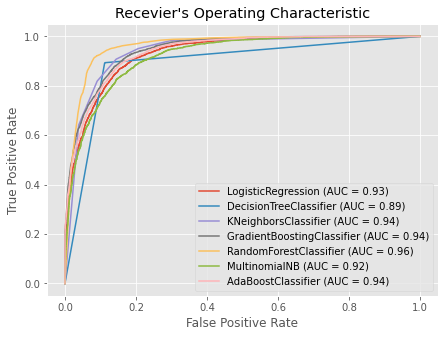

In [137]:
classifiers = [lg, dtc, knc,gbc, rfc, nb, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Case 9: No outliers,  MinMaxScaler, Encoding the features by frequency of the values in the column and No SMOTE

In [138]:
dat = Data.copy()

In [139]:
dat['income'] = dat['income'].str.replace('<=50K', '0')
dat['income'] = dat['income'].str.replace('>50K', '1')
dat['income'] = dat['income'].astype(np.int64)

In [140]:
dtt = dat.copy()

In [141]:
dtt.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0


In [142]:
print(f"Unique values in 'education': {dtt.education.nunique()}\nUnique values in 'Education_num': {dtt['education'].nunique()}")

Unique values in 'education': 16
Unique values in 'Education_num': 16


In [143]:
dtt.drop(['education'], axis = 1, inplace = True)

In [144]:
dtt['workclass'] = dtt['workclass'].str.replace('Never-worked', 'Without-pay')
dtt['workclass'] = dtt['workclass'].replace('?', np.NaN)

In [145]:
from scipy.stats import mode
workclass_md = dtt.pivot_table(values='workclass', columns='occupation',aggfunc=(lambda x:mode(x).mode[0]))
workclass_md

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,Without-pay,Private,Federal-gov,Private,Private,Private,Private,Private,Private,Private,Private,Local-gov,Private,Private,Private


In [146]:
dtt['occupation'] = dtt['occupation'].replace('?', np.NaN)
dtt = dtt.loc[dtt['occupation'].isnull() == False]

In [147]:
dtt['native-country'] = np.where(dtt['native-country'].str.contains("United-States"), "United-States", "Other")


In [148]:
dtt['native-country'].value_counts()

United-States    41292
Other             4741
Name: native-country, dtype: int64

In [149]:
dtt['ch_country'] = dtt['native-country'].map({'United-States' : 1, 'Other' : 0})
dtt.drop(['native-country'], axis = 1, inplace = True)

In [150]:
dtt['gender'] = dtt['gender'].map({'Male':0,'Female':1})

In [151]:
ch_workclass = (dtt.groupby('workclass').size()) / len(dtt)
dtt['chh_workclass'] = dtt['workclass'].apply(lambda x : ch_workclass[x])

ch_occupation = (dtt.groupby('occupation').size()) / len(dtt)
dtt['occupation_enc'] = dtt['occupation'].apply(lambda x : ch_occupation[x])

ch_marital_status = (dtt.groupby('marital-status').size()) / len(dtt)
dtt['marital_status_enc'] = dtt['marital-status'].apply(lambda x : ch_marital_status[x])

ch_race = (dtt.groupby('race').size()) / len(dtt)
dtt['race_enc'] = dtt['race'].apply(lambda x : ch_race[x])

ch_relationship = (dtt.groupby('relationship').size()) / len(dtt)
dtt['relationship_enc'] = dtt['relationship'].apply(lambda x : ch_relationship[x])



In [152]:
dtt.drop(['workclass','occupation','marital-status','race', 'relationship'], axis = 1, inplace = True)

In [153]:
dtt.head(2)

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,ch_country,chh_workclass,occupation_enc,marital_status_enc,race_enc,relationship_enc
0,25,226802,7,0,0,0,40,0,1,0.736559,0.065649,0.323138,0.094628,0.145678
1,38,89814,9,0,0,0,50,0,1,0.736559,0.032368,0.465992,0.856864,0.412856


In [154]:
zabs = np.abs(stats.zscore(dtt.loc[:,'fnlwgt':'hours-per-week']))
print(np.shape(np.where(zabs >= 3)))


(2, 3864)


In [155]:
dtt = dtt[(zabs < 3).all(axis = 1)]

In [156]:
d2 = dtt.copy()

In [157]:
included_cols = ['age','fnlwgt','educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [158]:
scale = MinMaxScaler()
dtt[included_cols] = scale.fit_transform(dtt[included_cols])
dtt

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,ch_country,chh_workclass,occupation_enc,marital_status_enc,race_enc,relationship_enc
0,0.109589,0.432808,0.307692,0,0.00000,0.0,0.492958,0,1,0.736559,0.065649,0.323138,0.094628,0.145678
1,0.287671,0.154497,0.461538,0,0.00000,0.0,0.633803,0,1,0.736559,0.032368,0.465992,0.856864,0.412856
2,0.150685,0.656592,0.692308,0,0.00000,0.0,0.492958,1,1,0.068125,0.021354,0.465992,0.856864,0.412856
3,0.369863,0.297746,0.538462,0,0.34882,0.0,0.492958,1,1,0.736559,0.065649,0.465992,0.094628,0.412856
5,0.232877,0.375701,0.230769,0,0.00000,0.0,0.352113,0,1,0.736559,0.106945,0.323138,0.856864,0.258858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.494774,0.692308,1,0.00000,0.0,0.464789,0,1,0.736559,0.031412,0.465992,0.856864,0.046467
48838,0.315068,0.285660,0.461538,0,0.00000,0.0,0.492958,1,1,0.736559,0.065649,0.465992,0.856864,0.412856
48839,0.561644,0.280654,0.461538,1,0.00000,0.0,0.492958,0,1,0.736559,0.121891,0.028154,0.856864,0.105728
48840,0.068493,0.381383,0.461538,0,0.00000,0.0,0.211268,0,1,0.736559,0.121891,0.323138,0.856864,0.145678


In [159]:
x=dtt.drop(['income'],axis=1)
y=dtt['income']

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [161]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 83.57979415592098
Accuracy Score of Logistic Regression model in test is  83.72031115975037
...........

Accuracy Score of Decision Tree Classifier model in test is 80.70507512125873
Accuracy Score of Decision Tree Classifier model in train is 99.99112662308852
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 82.31397137111085
Accuracy Score of K-Nearest Neighbour Classifier model in train is 87.938122985004
.............

Accuracy Score of Gradient Boosting Classifier model in test is 86.54915414645687
Accuracy Score of Gradient Boosting Classifier model in train is 86.40598657162293
.............

Accuracy Score of Random Forest model in test is 84.79829646279427
Accuracy Score of Random Forest model in train is 99.9881688307847
.............

Accuracy Score of MultinomialNB model in test is 79.01336803501715
Accuracy Score of MultinomialNB model in train is 79.03516815049247
.............

Accurac

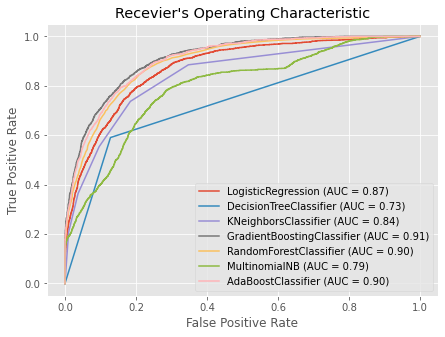

In [162]:
classifiers = [lg, dtc, knc,gbc, rfc, nb, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### Case 10: No outliers,  MinMaxScaler, Encoding the features by frequency of the values in the column and SMOTE

In [163]:
x1, y1 = smk.fit_resample(x, y)

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)

In [165]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model in train is", accuracy_score(y_test, pred_lg)*100)
pred_y = lg.predict(x_train)
print("Accuracy Score of Logistic Regression model in test is ", accuracy_score(y_train, pred_y)*100)  
print("...........\n")
# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model in test is", accuracy_score(y_test, pred_dtc)*100)
pred_dtc_train = dtc.predict(x_train)
print("Accuracy Score of Decision Tree Classifier model in train is", accuracy_score(y_train, pred_dtc_train)*100)
print("............\n")
# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model in test is", accuracy_score(y_test, pred_knc)*100)
pred_knc_train = knc.predict(x_train)
print("Accuracy Score of K-Nearest Neighbour Classifier model in train is", accuracy_score(y_train, pred_knc_train)*100)
print(".............\n")


#For Gradient boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
pred_gbc = gbc.predict(x_test)
print("Accuracy Score of Gradient Boosting Classifier model in test is", accuracy_score(y_test, pred_gbc)*100)
pred_gbc_train = gbc.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
print(".............\n")

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, pred_rfc)*100)
pred_rfc_train = rfc.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)
print(".............\n")

#For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model in test is", accuracy_score(y_test, pred_nb)*100)
pred_nb_train = nb.predict(x_train)
print("Accuracy Score of MultinomialNB model in train is", accuracy_score(y_train, pred_nb_train)*100)
print(".............\n")

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model in test is", accuracy_score(y_test, pred_ada)*100)
pred_ada_train = ada.predict(x_train)
print("Accuracy Score of ADA Boost model in train is", accuracy_score(y_train, pred_ada_train)*100)

Accuracy Score of Logistic Regression model in train is 80.83728278041075
Accuracy Score of Logistic Regression model in test is  80.902448657188
...........

Accuracy Score of Decision Tree Classifier model in test is 86.90363349131121
Accuracy Score of Decision Tree Classifier model in train is 99.99407582938389
............

Accuracy Score of K-Nearest Neighbour Classifier model in test is 86.5955766192733
Accuracy Score of K-Nearest Neighbour Classifier model in train is 90.56477093206951
.............

Accuracy Score of Gradient Boosting Classifier model in test is 87.73301737756714
Accuracy Score of Gradient Boosting Classifier model in train is 88.13783570300157
.............

Accuracy Score of Random Forest model in test is 90.97946287519747
Accuracy Score of Random Forest model in train is 99.99407582938389
.............

Accuracy Score of MultinomialNB model in test is 67.23538704581358
Accuracy Score of MultinomialNB model in train is 67.05963665086888
.............

Accurac

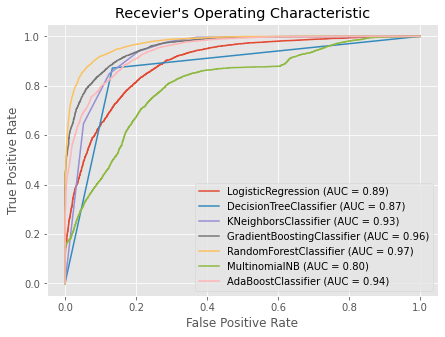

In [166]:
classifiers = [lg, dtc, knc,gbc, rfc, nb, ada]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

### CASE 11: No outliers,  MinMaxScaler, Encoding the features by frequency of the values in the column , SMOTE and Hyper Parameter Tuning 

## Lets see after tuning the models

#### Hyper Parameters Tuning of Random  Forest

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
param_grid = {"n_estimators":[5,20,50], 'max_depth':range(5,16,5), 'min_samples_split':range(200,1001,500),
             'min_samples_leaf':range(30,71,20),} 
               
grid = GridSearchCV(RandomForestClassifier(), param_grid,verbose=True)
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'max_depth': 15,
 'min_samples_leaf': 30,
 'min_samples_split': 200,
 'n_estimators': 50}

In [177]:
rfc_model = RandomForestClassifier(max_depth = best_param['max_depth'],
                                  min_samples_leaf = best_param['min_samples_leaf'],
                                 min_samples_split = best_param['min_samples_split'],
                                 n_estimators = best_param['n_estimators'])
rfc_model.fit(x_train,y_train)

rfc_pred =  rfc_model.predict(x_test)
print("Accuracy Score of Random Forest model in test is", accuracy_score(y_test, rfc_pred)*100)

pred_rfc_train = rfc_model.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_rfc_train)*100)

print(confusion_matrix(y_test, rfc_pred))

Accuracy Score of Random Forest model in test is 86.31911532385466
Accuracy Score of Random Forest model in train is 86.87401263823065
[[5198 1134]
 [ 598 5730]]


#### Hyper Parameters Tuning of LogisticRegression

In [178]:
param_grid={'C': np.logspace(-3, 0, 20)}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

{'C': 0.3359818286283781}

In [179]:
log_model = LogisticRegression(C = best_param['C'])
log_model.fit(x_train,y_train)

log_pred =  log_model.predict(x_test)
print("Accuracy Score of Logistic Regression model in test is", accuracy_score(y_test, log_pred)*100)

pred_log_train = log_model.predict(x_train)
print("Accuracy Score of Random Forest model in train is", accuracy_score(y_train, pred_log_train)*100)

print(confusion_matrix(y_test, log_pred))

Accuracy Score of Logistic Regression model in test is 80.89257503949447
Accuracy Score of Random Forest model in train is 80.94194312796209
[[5024 1308]
 [1111 5217]]


#### Hyper Parameters Tuning of Gradient Boosting Classifier

In [180]:
param_test = {"n_estimators":[5,20,50,100],
              'max_depth':range(5,10,15),
              "learning_rate":[0.1,1,10]}

grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=param_test,verbose=True);
grid.fit(x_train,y_train)
best_param = grid.best_params_
best_param

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'learning_rate': 1, 'max_depth': 5, 'n_estimators': 50}

In [182]:
gbc_model = GradientBoostingClassifier(n_estimators=best_param['n_estimators'],max_depth=best_param['max_depth'],learning_rate=best_param['learning_rate'])
gbc_model.fit(x_train,y_train)

gbc_pred = gbc_model.predict(x_test)
print("Accuracy Score of  Gradient Boosting Classifier model in test is", accuracy_score(y_test, gbc_pred)*100)

pred_gbc_train = gbc_model.predict(x_train)
print("Accuracy Score of Gradient Boosting Classifier model in train is", accuracy_score(y_train, pred_gbc_train)*100)
      
print(confusion_matrix(y_test,gbc_pred))

Accuracy Score of  Gradient Boosting Classifier model in test is 90.45813586097947
Accuracy Score of Gradient Boosting Classifier model in train is 93.08056872037915
[[5780  552]
 [ 656 5672]]


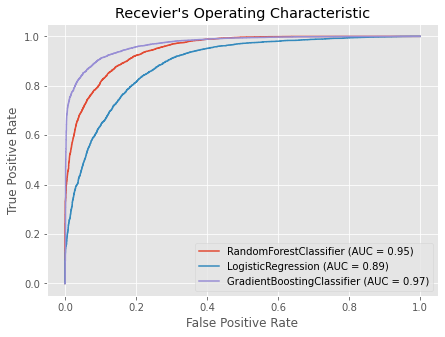

In [192]:
classifiers = [rfc_model,log_model, gbc_model]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

#### Hyper Parameters Tuning of kNearestNeighbors

In [184]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
param_grid = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
grid = GridSearchCV(model, param_grid=param_grid, n_jobs=1)
#Learning
grid.fit(x_train,y_train)
#The best hyper parameters set

best_param = grid.best_params_
best_param



{'algorithm': 'auto',
 'leaf_size': 1,
 'n_jobs': -1,
 'n_neighbors': 6,
 'weights': 'distance'}

In [191]:
#Prediction
knn_pred=grid.predict(x_test)
print("Accuracy Score of K-NN model in test is", accuracy_score(y_test, knn_pred)*100)

pred_knn_train = grid.predict(x_train)
print("Accuracy Score of K-NN model in train is", accuracy_score(y_train, pred_knn_train)*100)


print("Confusion Metrix:\n",confusion_matrix(knn_pred,y_test))

Accuracy Score of K-NN model in test is 88.87835703001579
Accuracy Score of K-NN model in train is 99.99407582938389
Confusion Metrix:
 [[5142  218]
 [1190 6110]]


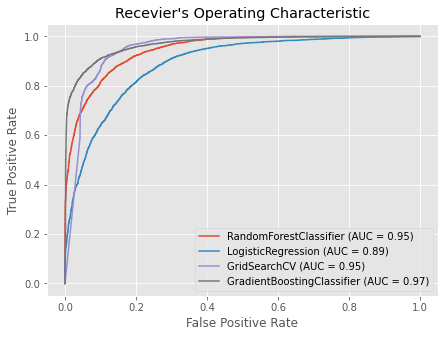

In [193]:
classifiers = [rfc_model,log_model,grid, gbc_model]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax,)
    plt.rcParams["figure.figsize"] = (7, 5)
    plt.title("Recevier's Operating Characteristic")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
  
    plt.plot(linestyle='--',color='red')

In [196]:
from sklearn.model_selection import RepeatedStratifiedKFold
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.891463 using {'learning_rate': 1.0, 'n_estimators': 500}
0.776540 (0.005716) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.776540 (0.005716) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.776540 (0.005716) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.776540 (0.005716) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.776540 (0.005716) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.776540 (0.005716) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.776540 (0.005716) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.776540 (0.005716) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.776540 (0.005716) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.776540 (0.005716) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.776540 (0.005716) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.821274 (0.006456) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.790008 (0.006518) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.822407

In [ ]:
# load required classifer
#from sklearn.ensemble import AdaBoostClassifier


# import Support Vector Classifier
#from sklearn.svm import SVC


# import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
#svc=SVC(probability=True, kernel='linear')


# create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=500, base_estimator=svc,learning_rate=1.0, random_state=10)


# train adaboost classifer
Ada = abc.fit(x_train, y_train)


# predict the response for test dataset
ada_pred = Ada.predict(x_test)
# calculate and print model accuracy
print("Model Accuracy with SVC Base Estimator in Test:",accuracy_score(y_test, ada_pred))

ada_pred_train = Ada.predict(x_train)
print("Model Accuracy with SVC Base Estimator in Train:",accuracy_score(y_train, ada_pred_train))

<p> AUC < 80% and Train Test Score < 70 :  Very Poor with Poor Probability 
<p> AUC < 80% and Train Test Score < 80 : Poor with Poor Probability
<p> AUC < 80% and Train Test Score < 90 : Good with Poor Probability 
 
 $$......$$
 
<p> AUC < 90% and Train Test Score < 70 : Very Poor with Average Probability 
<p> AUC < 90% and Train Test Score < 80 : Poor with Average Probability 
<p> AUC < 90% and Train Test Score < 90 : Good with Average Probability
 
  $$......$$
 
<p> AUC > 90% and Train Test Score < 70 :  Very Poor with Good probability  
<p> AUC > 90% and Train Test Score < 80 :  Poor with Good probability 
<p> AUC > 90% and Train Test Score < 90 :  Good with Good probability  
 
  $$......$$
 
<p> AUC > 90% and Train Test Score > 90 : Excellent 

 

## SUMMARY

Case 1: Not removing any outliers and apply Label Encoding

In [6]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',78.38,78.28])
x.add_row(['Dicision Tree',80.77,99.98])
x.add_row(['K-Nearest Neighbour',76.53,83.15])
x.add_row(['Gradient Boosting',86.06,86.47])
x.add_row(['Random Forest',85.24,99.98])
x.add_row(['MultinomialNB',77.22,77.76])
x.add_row(['ADA Boost',85.48,85.63])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    78.38    |   78.28    |
|    Dicision Tree    |    80.77    |   99.98    |
| K-Nearest Neighbour |    76.53    |   83.15    |
|  Gradient Boosting  |    86.06    |   86.47    |
|    Random Forest    |    85.24    |   99.98    |
|    MultinomialNB    |    77.22    |   77.76    |
|      ADA Boost      |    85.48    |   85.63    |
+---------------------+-------------+------------+


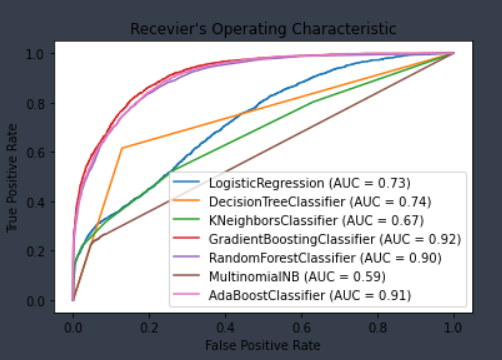

Case 2 :  Removing Outliers and Apply Label Encoding

In [18]:
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',81.26,81.00])
x.add_row(['Dicision Tree',80.81,99.99])
x.add_row(['K-Nearest Neighbour',81.30,86.98])
x.add_row(['Gradient Boosting',86.28,86.27])
x.add_row(['Random Forest',85.24,99.98])
x.add_row(['MultinomialNB',78.99,78.61])
x.add_row(['ADA Boost',85.67,85.59])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    81.26    |    81.0    |
|    Dicision Tree    |    80.81    |   99.99    |
| K-Nearest Neighbour |     81.3    |   86.98    |
|  Gradient Boosting  |    86.28    |   86.27    |
|    Random Forest    |    85.24    |   99.98    |
|    MultinomialNB    |    78.99    |   78.61    |
|      ADA Boost      |    85.67    |   85.59    |
+---------------------+-------------+------------+


Case 3 : No outliers and Apply Standard Scaler

In [19]:
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',82.45,82.64])
x.add_row(['Dicision Tree',80.41,99.98])
x.add_row(['K-Nearest Neighbour',82.64,88.17])
x.add_row(['Gradient Boosting',85.94,86.29])
x.add_row(['Random Forest',85.24,99.98])
x.add_row(['ADA Boost',85.39,85.63])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    82.45    |   82.64    |
|    Dicision Tree    |    80.41    |   99.98    |
| K-Nearest Neighbour |    82.64    |   88.17    |
|  Gradient Boosting  |    85.94    |   86.29    |
|    Random Forest    |    85.24    |   99.98    |
|      ADA Boost      |    85.39    |   85.63    |
+---------------------+-------------+------------+


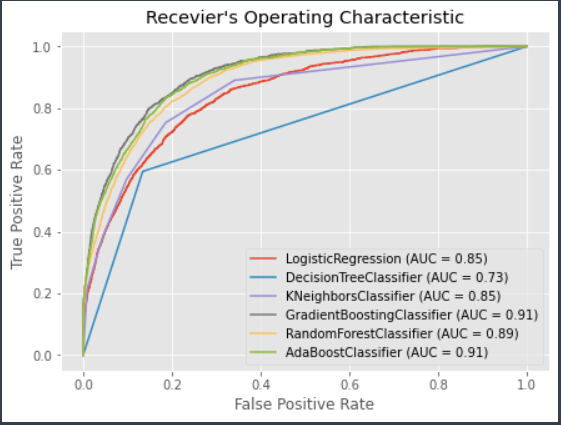

Case 4 : No outliers and One Hot Encoding (Here I replace the values of some columns and apply dummies with all catagorical feature)

In [8]:
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',84.28,84.35])
x.add_row(['Dicision Tree',84.69,87.09])
x.add_row(['K-Nearest Neighbour',84.90,85.88])
x.add_row(['Gradient Boosting',85.36,85.64])
x.add_row(['Random Forest',84.83,87.09])
x.add_row(['MultinomialNB',78.33,78.76])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    84.28    |   84.35    |
|    Dicision Tree    |    84.69    |   87.09    |
| K-Nearest Neighbour |     84.9    |   85.88    |
|  Gradient Boosting  |    85.36    |   85.64    |
|    Random Forest    |    84.83    |   87.09    |
|    MultinomialNB    |    78.33    |   78.76    |
+---------------------+-------------+------------+


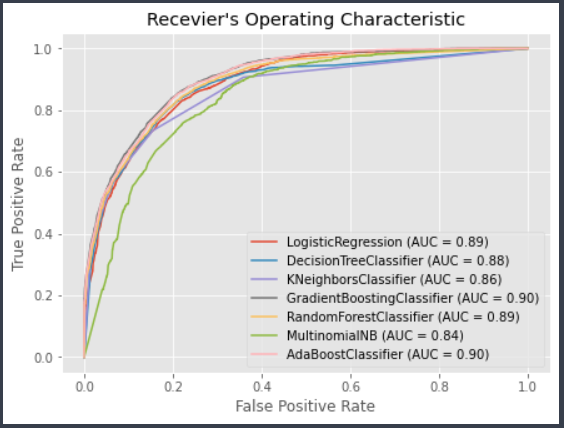

Case 5: No outliers, dummies feature and Standardization

In [7]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',84.29,84.79])
x.add_row(['Dicision Tree',84.40,87.14])
x.add_row(['K-Nearest Neighbour',82.58,84.82])
x.add_row(['Gradient Boosting',85.13,85.82])
x.add_row(['Random Forest',84.44,87.14])

x.add_row(['ADA Boost',84.77,85.38])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    84.29    |   84.79    |
|    Dicision Tree    |     84.4    |   87.14    |
| K-Nearest Neighbour |    82.58    |   84.82    |
|  Gradient Boosting  |    85.13    |   85.82    |
|    Random Forest    |    84.44    |   87.14    |
|      ADA Boost      |    84.77    |   85.38    |
+---------------------+-------------+------------+


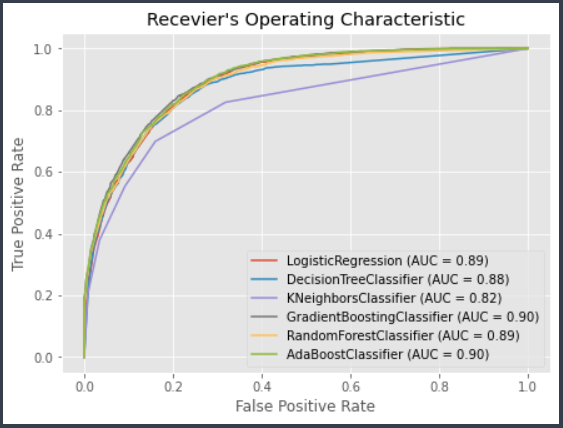

Case 6: No outliers, Label Encoding and MinMaxScaler

In [6]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',82.35,82.64])
x.add_row(['Dicision Tree',80.10,99.98])
x.add_row(['K-Nearest Neighbour',83.45,88.05])
x.add_row(['Gradient Boosting',86.13,86.43])
x.add_row(['Random Forest',85.21,99.98])
x.add_row(['MultinomialNB',78.30,78.83])
x.add_row(['ADA Boost',85.43,85.75])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    82.35    |   82.64    |
|    Dicision Tree    |     80.1    |   99.98    |
| K-Nearest Neighbour |    83.45    |   88.05    |
|  Gradient Boosting  |    86.13    |   86.43    |
|    Random Forest    |    85.21    |   99.98    |
|    MultinomialNB    |     78.3    |   78.83    |
|      ADA Boost      |    85.43    |   85.75    |
+---------------------+-------------+------------+


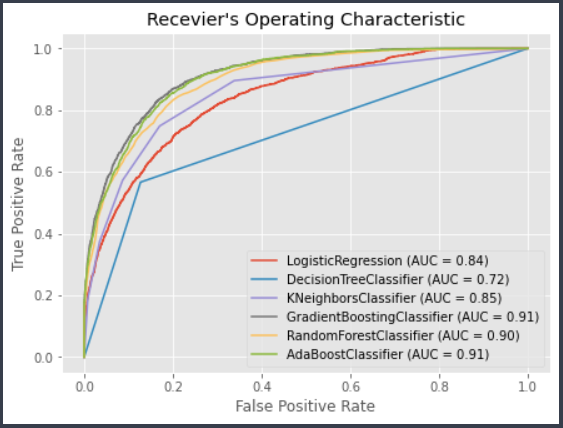

Case 7: No outliers, One-Hot Encoding and MinMaxScaler

In [5]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',84.40,84.78])
x.add_row(['Dicision Tree',80.13,99.77])
x.add_row(['K-Nearest Neighbour',81.46,87.25])
x.add_row(['Gradient Boosting',85.46,85.89])
x.add_row(['Random Forest',81.32,99.76])
x.add_row(['MultinomialNB',83.67,84.05])
x.add_row(['ADA Boost',85.44,85.32])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |     84.4    |   84.78    |
|    Dicision Tree    |    80.13    |   99.77    |
| K-Nearest Neighbour |    81.46    |   87.25    |
|  Gradient Boosting  |    85.46    |   85.89    |
|    Random Forest    |    81.32    |   99.76    |
|    MultinomialNB    |    83.67    |   84.05    |
|      ADA Boost      |    85.44    |   85.32    |
+---------------------+-------------+------------+


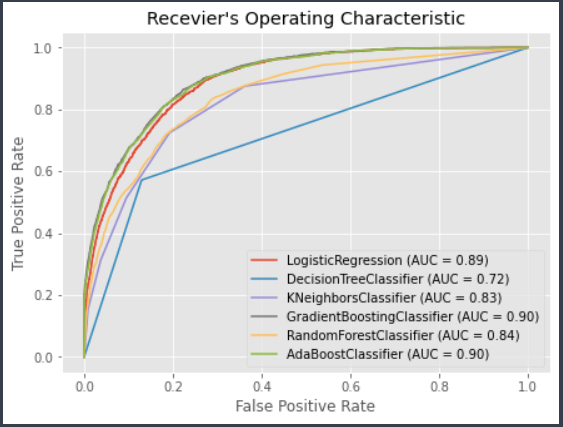

Case 8 No outliers, One-Hot Encoding, MinMaxScaler & SMOTE

In [4]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',85.61,85.43])
x.add_row(['Dicision Tree',88.96,99.84])
x.add_row(['K-Nearest Neighbour',88.18,91.38])
x.add_row(['Gradient Boosting',87.15,86.92])
x.add_row(['Random Forest',91.53,99.83])
x.add_row(['MultinomialNB',84.09,84.12])
x.add_row(['ADA Boost',86.53,86.03])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    85.61    |   85.43    |
|    Dicision Tree    |    88.96    |   99.84    |
| K-Nearest Neighbour |    88.18    |   91.38    |
|  Gradient Boosting  |    87.15    |   86.92    |
|    Random Forest    |    91.53    |   99.83    |
|    MultinomialNB    |    84.09    |   84.12    |
|      ADA Boost      |    86.53    |   86.03    |
+---------------------+-------------+------------+


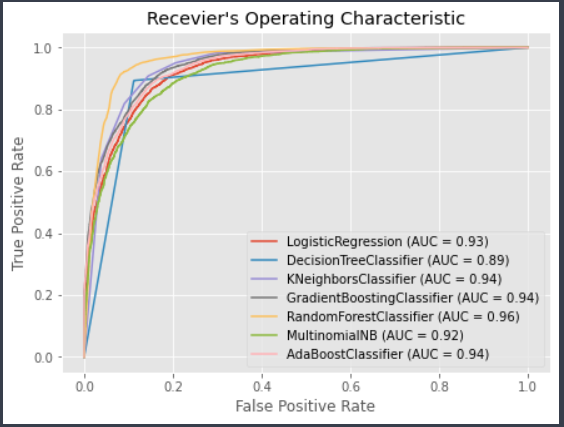

Case 9: No outliers,  MinMaxScaler, Encoding the features by frequency of the values in the column and No SMOTE

In [3]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',83.57,83.72])
x.add_row(['Dicision Tree',80.99,99.99])
x.add_row(['K-Nearest Neighbour',82.31,87.93])
x.add_row(['Gradient Boosting',86.54,86.40])
x.add_row(['Random Forest',84.79,99.98])
x.add_row(['MultinomialNB',79.03,79.03])
x.add_row(['ADA Boost',85.82,85.49])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    83.57    |   83.72    |
|    Dicision Tree    |    80.99    |   99.99    |
| K-Nearest Neighbour |    82.31    |   87.93    |
|  Gradient Boosting  |    86.54    |    86.4    |
|    Random Forest    |    84.79    |   99.98    |
|    MultinomialNB    |    79.03    |   79.03    |
|      ADA Boost      |    85.82    |   85.49    |
+---------------------+-------------+------------+


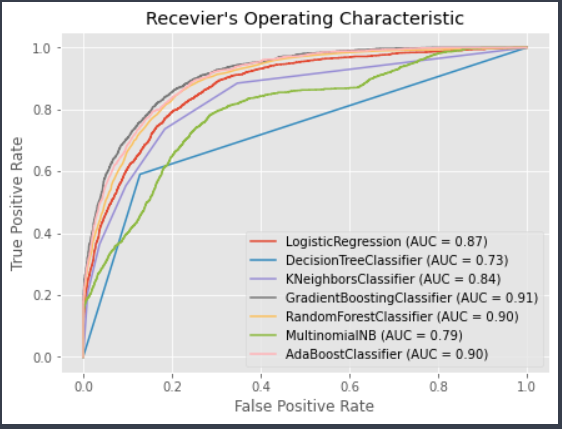

Case 10: No outliers,  MinMaxScaler, Encoding the features by frequency of the values in the column and  SMOTE

In [2]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Train Score", "Test Score"])

x.add_row(['Logistic Regression',80.83,80.90])
x.add_row(['Dicision Tree',86.90,99.99])
x.add_row(['K-Nearest Neighbour',86.59,90.56])
x.add_row(['Gradient Boosting',87.73,88.13])
x.add_row(['Random Forest',90.97,99.99])
x.add_row(['MultinomialNB',77.23,67.05])
x.add_row(['ADA Boost',85.48,85.63])

print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    80.83    |    80.9    |
|    Dicision Tree    |     86.9    |   99.99    |
| K-Nearest Neighbour |    86.59    |   90.56    |
|  Gradient Boosting  |    87.73    |   88.13    |
|    Random Forest    |    90.97    |   99.99    |
|    MultinomialNB    |    77.23    |   67.05    |
|      ADA Boost      |    85.48    |   85.63    |
+---------------------+-------------+------------+


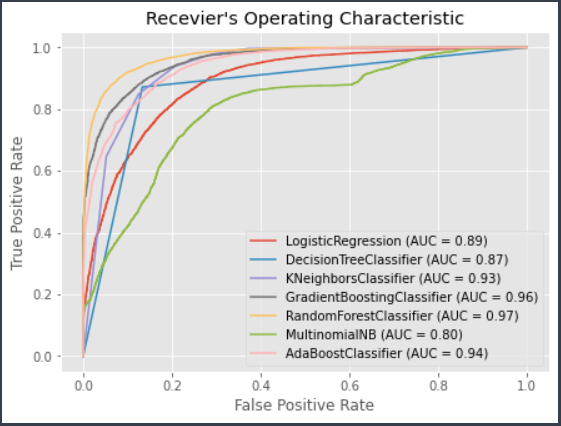

Losgostic Regression 

CASE 11: No outliers,  MinMaxScaler, Encoding the features by frequency of the values in the column , SMOTE and Hyper Parameter Tuning 

In [1]:
x = PrettyTable(["Model", "Train Score", "Test Score"])
x.add_row(['Logistic Regression',80.89,80.94])
x.add_row(['K-Nearest Neighbour',88.87,99.99])
x.add_row(['Gradient Boosting',90.45,93.08])
x.add_row(['Random Forest',86.31,86.87])


print(x)

+---------------------+-------------+------------+
|        Model        | Train Score | Test Score |
+---------------------+-------------+------------+
| Logistic Regression |    80.89    |   80.94    |
| K-Nearest Neighbour |    88.87    |   99.99    |
|  Gradient Boosting  |    90.45    |   93.08    |
|    Random Forest    |    86.31    |   86.87    |
+---------------------+-------------+------------+


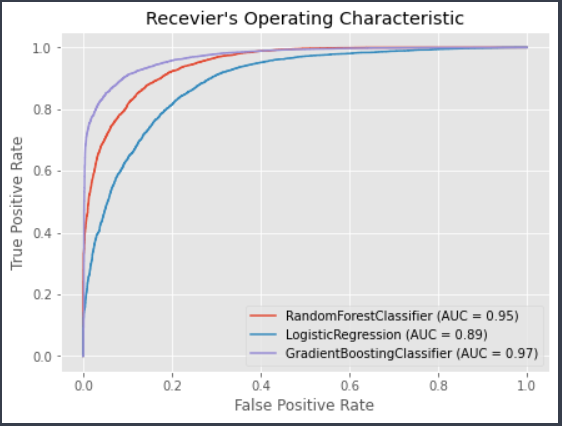

In [7]:
#!pip install https://pypi.python.org/packages/source/P/PrettyTable/prettytable-0.7.2.tar.bz2